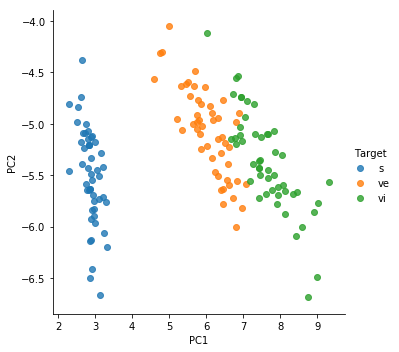

In [74]:
# Script for reducing dimension using PCA
# Programmer: Abdullah Al Mamun
# Date: March 18, 2019
# Ref: https://medium.com/@kyasar.mail/pca-principal-component-analysis-729068e28ec8 
# sklearn has built-in iris dataset
# load and store it as numpy array for further matrix calculations in PCA
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
R = np.array(iris.data)

# Compute the covariance matrix using y-axes only
R_cov = np.cov(R, rowvar=False)


# Print the cov mat
# print(R_cov)

# Compute the eigenvalues and eigenvectors of a square array using numpy linear algebra lib
eig_values, eig_vectors = np.linalg.eig(R_cov)

# print values and vectors
# print(eig_values)
# print(eig_vectors)

# pick 2 eigenvectors whose eigenvalues are highest
featureVector = eig_vectors[:,:2]
# print(featureVector)

featureVector_t = np.transpose(featureVector)
R_t = np.transpose(R)

# Transpose to adjust new features
newDB_t = np.matmul(featureVector_t, R_t)
newDB = np.transpose(newDB_t)
newDB.shape

# for plotting 
import pandas as pd
import seaborn as sns
%matplotlib inline 

df = pd.DataFrame(data=newDB, columns=['PC1','PC2'])
y=pd.Series(iris.target)

# make 3 classes with 3 colors
y=y.replace(0, 's')
y=y.replace(1, 've')
y=y.replace(2, 'vi')
df['Target'] = y

sns.lmplot(x='PC1', y='PC2', data=df, hue='Target', fit_reg=False, legend=True)

/lclhome/mmamu009/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:591: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


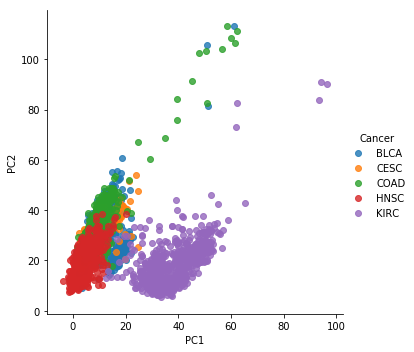

In [22]:
# using Expression values
import numpy as np
import pandas as pd

df1 = pd.read_csv('lncRNA/DeepCC/Data/BLCA_CESC_COAD_HNSC_KIRC.csv')
# df1 = pd.read_csv('exp.csv')
R = np.array(df1.values)

R_cov = np.cov(R, rowvar=False)

eig_values, eig_vectors = np.linalg.eig(R_cov)

featureVector = eig_vectors[:,:2]

featureVector_t = np.transpose(featureVector)

R_t = np.transpose(R)
newDB_t = np.matmul(featureVector_t, R_t)
newDB = np.transpose(newDB_t)
# print(newDB)

import seaborn as sns
%matplotlib inline 

df = pd.DataFrame(data=newDB, columns=['PC1','PC2'])
y=df1.iloc[:,-1]

# make 3 classes with 3 colors
y=y.replace(0, 'BLCA')
y=y.replace(1, 'CESC')
y=y.replace(2, 'COAD')
y=y.replace(3, 'HNSC')
y=y.replace(4, 'KIRC')
df['Cancer'] = y

sns.lmplot(x='PC1', y='PC2', data=df, hue='Cancer', fit_reg=False, legend=True)

# sns.lmplot(x='PC1', y='PC2', data=df1, fit_reg=False, legend=True)

In [5]:
from sklearn.decomposition import PCA

df = pd.read_csv('')

pca = PCA(n_components=10)
pca_result = pca.fit_transform(df.values)

# print(pca_result)


# import seaborn as sns
# %matplotlib inline 

# df1 = pd.DataFrame(data=pca_result, columns=['PC1','PC2'])
# sns.lmplot(x='PC1', y='PC2', data=df1, fit_reg=False, legend=True)

In [84]:
n_sne = 10000

time_start = time.time()

tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_pca_results = tsne.fit_transform(pca_result_50[rndperm[:n_sne]])

print ('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

NameError: name 'pca_result_50' is not defined